In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/spotify-2023.csv", encoding ='cp1251')

print(data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [ ]:
missing_values = data.isnull().sum()
print('К-сть пропусків в стопчиках:')
print(missing_values)

num_rows, num_columns = data.shape
print('Розмір датасета {} рядків {} стопвців'.format(num_rows, num_columns))



К-сть пропусків в стопчиках:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
Розмір датасета 953 рядків 24 стопвців


In [ ]:
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

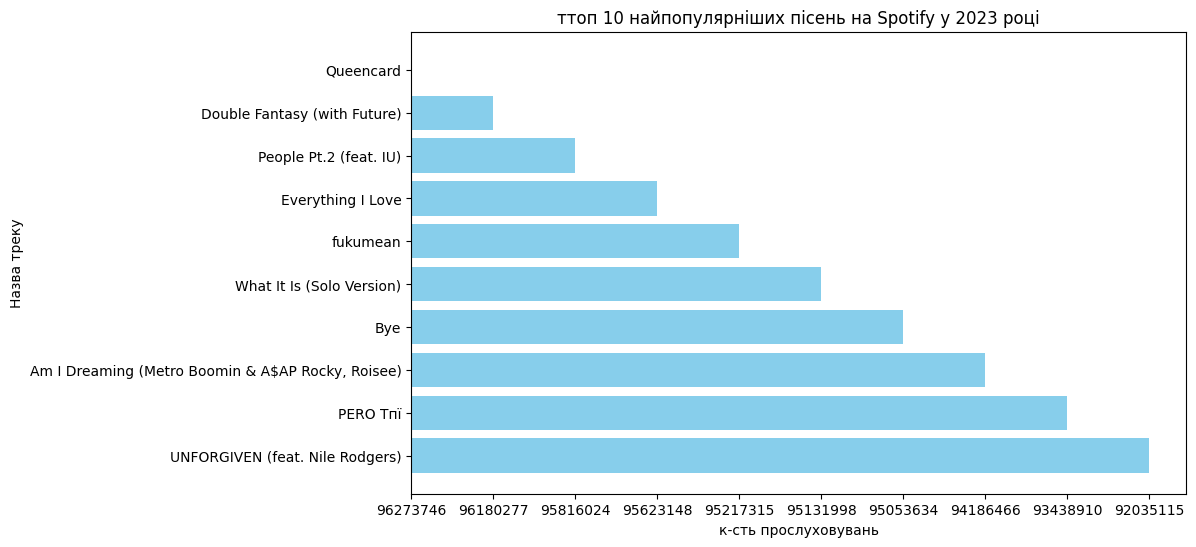

In [ ]:
songs_2023 = data[data["released_year"]== 2023]
top_10_songs = songs_2023.sort_values(by='streams', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['streams'], color='skyblue')
plt.xlabel('к-сть прослуховувань')
plt.ylabel('Назва треку')
plt.title('ттоп 10 найпопулярніших пісень на Spotify у 2023 році')
plt.gca().invert_yaxis()
plt.show()

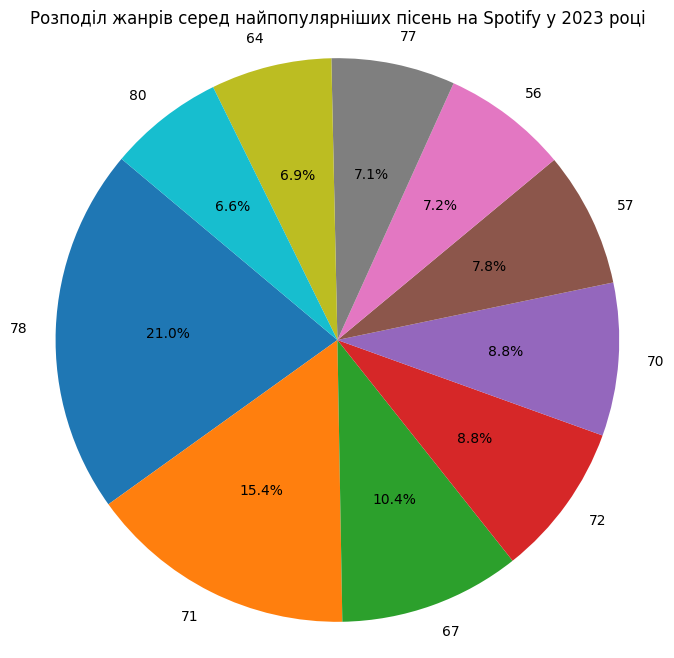

In [ ]:


genre_distribution = songs_2023.groupby('danceability_%')['streams'].sum().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(genre_distribution, labels=genre_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Розподіл жанрів серед найпопулярніших пісень на Spotify у 2023 році')
plt.axis('equal')
plt.show()

In [ ]:
selected_columns = ['track_name',  'artist(s)_name', 'released_month', 'in_shazam_charts', 'streams']

songs_2023_selected = songs_2023[selected_columns]
print(songs_2023_selected.head())

                            track_name     artist(s)_name  released_month  \
0  Seven (feat. Latto) (Explicit Ver.)   Latto, Jung Kook               7   
1                                 LALA        Myke Towers               3   
2                              vampire     Olivia Rodrigo               6   
4                       WHERE SHE GOES          Bad Bunny               5   
5                             Sprinter  Dave, Central Cee               6   

  in_shazam_charts    streams  
0              826  141381703  
1              382  133716286  
2              949  140003974  
4              425  303236322  
5              946  183706234  


In [ ]:
songs_2023_selected.loc[:, 'streams'] = songs_2023_selected['streams'].astype(float)
songs_2023_selected.dtypes

<ipython-input-59-d40c64a148d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_2023_selected.loc[:, 'streams'] = songs_2023_selected['streams'].astype(float)
<ipython-input-59-d40c64a148d0>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  songs_2023_selected.loc[:, 'streams'] = songs_2023_selected['streams'].astype(float)


track_name           object
artist(s)_name       object
released_month        int64
in_shazam_charts     object
streams             float64
dtype: object

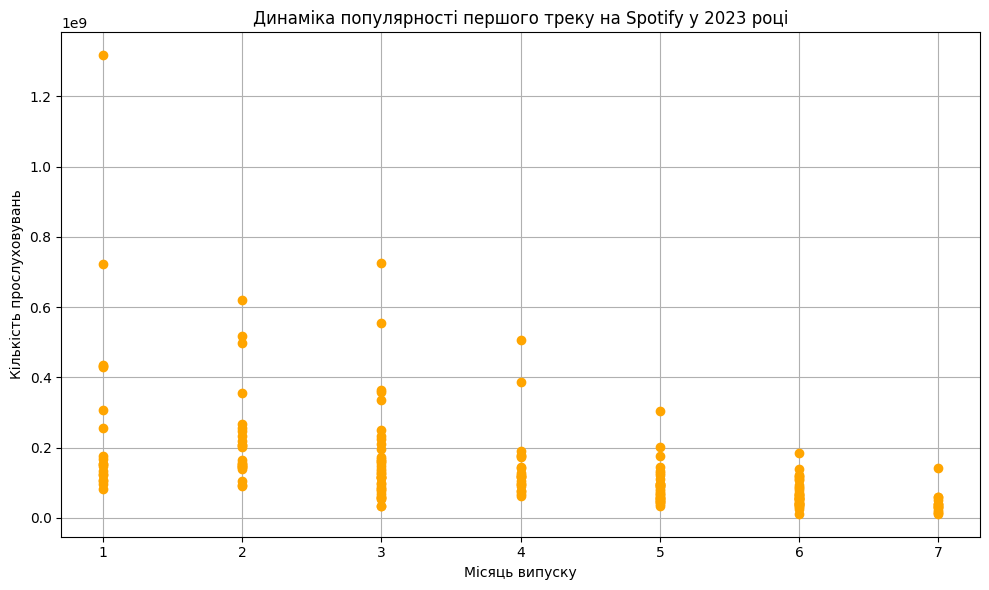

In [ ]:
plt.figure(figsize=(10, 6))
for track_name, track_data in songs_2023_selected.groupby('track_name'):
  plt.plot(
      track_data['released_month'],
      track_data['streams'],
      marker = 'o',
      linestyle = '-',
      color = 'orange',
      label=track_name
  )
plt.xlabel('Місяць випуску')
plt.ylabel('Кількість прослуховувань')
plt.title('Динаміка популярності першого треку на Spotify у 2023 році')
plt.xticks(songs_2023_selected['released_month'].unique())
plt.grid(True)
plt.tight_layout()
plt.show()

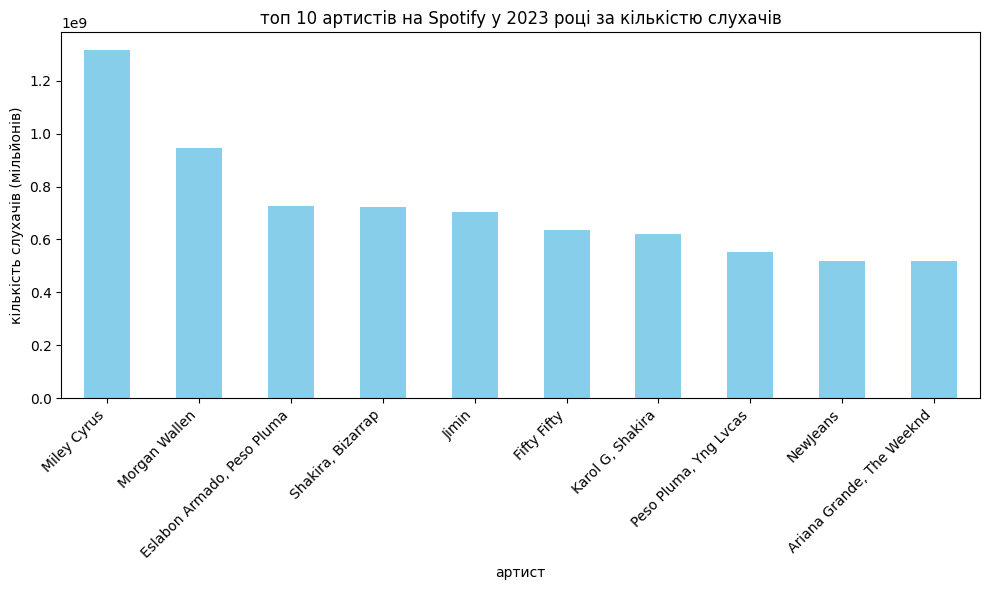

In [ ]:
artist_popularity = songs_2023.groupby('artist(s)_name')['streams'].sum()

top_10_artists = artist_popularity.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color='skyblue')
plt.xlabel('артист')
plt.ylabel('кількість слухачів (мільйонів)')
plt.title('топ 10 артистів на Spotify у 2023 році за кількістю слухачів')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


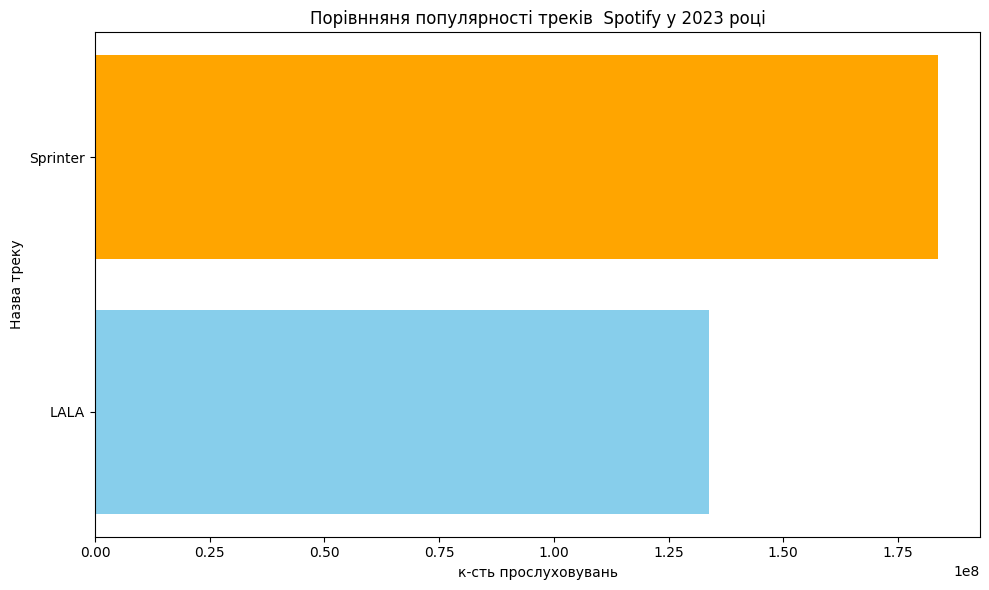

In [ ]:
selected_tracks = ['LALA', 'Vampire', 'Sprinter']

tracks_data = songs_2023[songs_2023['track_name'].isin(selected_tracks)]

plt.figure(figsize=(10, 6))
plt.barh(tracks_data['track_name'], tracks_data['streams'], color=['skyblue', 'orange', 'green'])
plt.xlabel('к-сть прослуховувань')
plt.ylabel('Назва треку')
plt.title('Порівнняня популярності треків  Spotify у 2023 році')
plt.tight_layout()
plt.show()


Висновок: На цій лабораторній роботі було проведено аналіз даних з Spotify за 2023 рік. Було виконано візуалізації графіків від лінійних до кругових. Також була проведена аналітика динаміки популярності за допомогою графіків. Були використані різні бібліотеки, такі як: numpy, pandas, skikit learn та matplotlib.